[View in Colaboratory](https://colab.research.google.com/github/alohays/Neural-Nets-Study/blob/master/pytorch_study1_tutorial.ipynb)

In [2]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

tcmalloc: large alloc 1073750016 bytes == 0x5bcc4000 @  0x7f9ee5a6d1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.4.0
True


In [3]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
ls

datalab/  drive/


In [20]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Linear Model with numpy

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

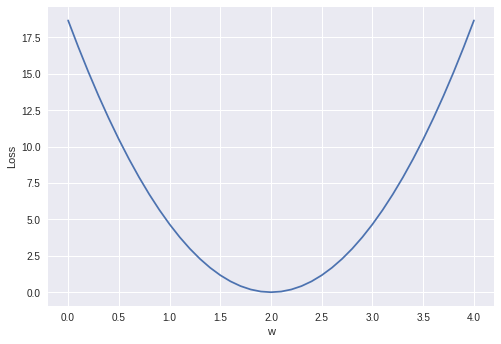

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

# w=1.0

def forward(x):
  return x*w

def loss(x,y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y)

w_list=[]
mse_list=[]

for w in np.arange(0.0, 4.1, 0.1):
  print("w=",w)
  l_sum=0
  for x_val, y_val in zip(x_data,y_data):
    y_pred_val = forward(x_val)
    l = loss(x_val,y_val)
    l_sum+=l
    print("\t", x_val, y_val, y_pred_val, l)
  print("MSE=",l_sum / 3)
  w_list.append(w)
  mse_list.append(l_sum / 3)
  
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

# Gradient descent with numpy

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w=1.0 # random guess

def forward(x):
  return x*w

def loss(x,y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y)

def gradient(x,y):
  return 2 * x * ( x * w - y )

print("predict (before training)", 4, forward(4))

for epoch in range(100):
  for x_val, y_val in zip(x_data, y_data):
    grad = gradient(x_val, y_val)
    w = w - 0.01 * grad
    print("\tgrad: ",x_val, y_val, grad)
    l = loss(x_val, y_val)
    
  print("progress: ",epoch, "w=",w,"loss=",l)
  
print("predict (after training)", "4 hours" , forward(4))
    

predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress:  0 w= 1.260688 loss= 4.919240100095999
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress:  1 w= 1.453417766656 loss= 2.688769240265834
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress:  2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress:  3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress:  4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress:  5 w= 1.836707389300983 loss= 0.2399802903801062
	grad:  1.0 2.0 -0.3265852213980338
	gr

# Back Propagation and Autograd with PyTorch

In [13]:
import torch
from torch.autograd import Variable

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w = Variable(torch.Tensor([1.0]), requires_grad = True)

def forward(x):
  return x*w

def loss(x,y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y)

print("predict (before training)", 4, forward(4))

for epoch in range(10):
  for x_val, y_val in zip(x_data, y_data):
    l = loss(x_val, y_val)
    l.backward()
    print("\tgrad: ",x_val, y_val, grad)
    w.data = w.data - 0.01 * w.grad.data
    
    w.grad.data.zero_()
    
  print("progress: ",epoch, "w=",w,"loss=",l)
  
print("predict (after training)", "4 hours" , forward(4))

predict (before training) 4 tensor([ 4.])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.6786572132332367e-12
	grad:  3.0 6.0 -1.6786572132332367e-12
progress:  0 w= tensor([ 1.2607]) loss= tensor([ 7.3159])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.6786572132332367e-12
	grad:  3.0 6.0 -1.6786572132332367e-12
progress:  1 w= tensor([ 1.4534]) loss= tensor([ 3.9988])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.6786572132332367e-12
	grad:  3.0 6.0 -1.6786572132332367e-12
progress:  2 w= tensor([ 1.5959]) loss= tensor([ 2.1857])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.6786572132332367e-12
	grad:  3.0 6.0 -1.6786572132332367e-12
progress:  3 w= tensor([ 1.7012]) loss= tensor([ 1.1946])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.6786572132332367e-12
	grad:  3.0 6.0 -1.6786572132332367e-12
progress:  4 w= tensor([ 1.7791]) loss= tensor([ 0.6530])
	grad:  1.0 2.0 -1.6786572132332367e-12
	grad:  2.0 4.0 -1.678657213

# Linear Regression in PyTorch way

## basic pytorch rythm
1. Design your model using class with Variables
2. Construct loss and optimizer (using pytorch api)
3. Training cycle (forward, backward, update)

### Other Optimizers
 - torch.optim.Adagrad
 - torch.optim.Adam
 - torch.optim.Adamax
 - torch.optim.ASGD
 - torch.optim.LBFGS
 - torch.optim.RMSprop
 - torch.optim.Rprop
 - torch.optim.SGD

In [12]:
import torch
from torch.autograd import Variable


# step1 Design your model using class with Variables

x_data = Variable(torch.Tensor([[1.0],[2.0],[3.0]]))
y_data = Variable(torch.Tensor([[2.0],[4.0],[6.0]]))

class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1,1) # one input, one output
    
  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

# our model instance
model = Model()

# step2 Construct loss and optimizer (using pytorch api)

criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# stpe3 Training cycle: forwad, loss, backward, step

for epoch in range(500):
  y_pred = model(x_data)
  
  loss = criterion(y_pred, y_data)
  if epoch % 50 == 0:
    print(epoch, loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
hour_var = Variable(torch.Tensor([[4.0]]))
print("predict (after training)", 4, model.forward(hour_var).item())

0 108.97834777832031
50 0.41449713706970215
100 0.20099374651908875
150 0.09746389091014862
200 0.04726118594408035
250 0.022917453199625015
300 0.01111286785453558
350 0.005388767924159765
400 0.002613053424283862
450 0.0012670927681028843
predict (after training) 4 7.971298694610596


# Logistic Regression with pytorch


sigmoid -> 0~1

loss function should be different -> cross entropy loss

In [17]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0], [4.0]]))
y_data = Variable(torch.Tensor([[0.], [0.], [1.], [1.]]))

class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1,1)
    
  def forward(self,x):
    y_pred = F.sigmoid(self.linear(x))
    return y_pred
  
model = Model()

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
  y_pred = model(x_data)
  
  loss = criterion(y_pred, y_data)
  if epoch % 50 == 0:
    print(epoch, loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
hour_var = Variable(torch.Tensor([[1.0]]))
print("predict 1 hour ",1.0,model(hour_var).item()>0.5)
hour_var = Variable(torch.Tensor([[7.0]]))
print("predict 7 hour ",1.0,model(hour_var).item()>0.5)

0 0.7944773435592651
50 0.7147016525268555
100 0.6833253502845764
150 0.6656846404075623
200 0.6512323617935181
250 0.6377397775650024
300 0.6247899532318115
350 0.6122987866401672
400 0.6002395749092102
450 0.5885959267616272
500 0.5773528218269348
550 0.5664961338043213
600 0.5560117959976196
650 0.5458860993385315
700 0.5361055731773376
750 0.5266572833061218
800 0.5175283551216125
850 0.5087064504623413
900 0.5001795291900635
950 0.4919361174106598
predict 1 hour  1.0 False
predict 7 hour  1.0 True


# Wide and Deep

In [45]:
cd ../../

/content


In [66]:
cd data

/content/drive/data


In [67]:
!wget https://github.com/hunkim/PyTorchZeroToAll/raw/master/data/diabetes.csv.gz

--2018-07-13 07:02:39--  https://github.com/hunkim/PyTorchZeroToAll/raw/master/data/diabetes.csv.gz
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hunkim/PyTorchZeroToAll/master/data/diabetes.csv.gz [following]
--2018-07-13 07:02:39--  https://raw.githubusercontent.com/hunkim/PyTorchZeroToAll/master/data/diabetes.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13539 (13K) [application/octet-stream]
Saving to: ‘diabetes.csv.gz’

diabetes.csv.gz     100%[===================>]  13.22K  51.0KB/s    in 0.3s    

2018-07-13 07:02:43 (51.0 KB/s) - ‘diabetes.csv.gz’ saved [13539/1

In [68]:
cd ../

/content/drive


In [57]:
import torch
from torch.autograd import Variable
import numpy as np

xy = np.loadtxt('./data/diabetes.csv.gz', delimiter=',', dtype=np.float32)
x_data = Variable(torch.from_numpy(xy[:, 0:-1]))
y_data = Variable(torch.from_numpy(xy[:, [-1]]))

class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.l1 = torch.nn.Linear(8,6)
    self.l2 = torch.nn.Linear(6,4)
    self.l3 = torch.nn.Linear(4,2)
    self.l4 = torch.nn.Linear(2,1)
    self.sigmoid = torch.nn.Sigmoid()
  
  def forward(self, x):
    out1 = self.sigmoid(self.l1(x))
    out2 = self.sigmoid(self.l2(out1))
    out3 = self.sigmoid(self.l3(out2))
    y_pred = self.sigmoid(self.l4(out3))
    return y_pred

model = Model()

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

for epoch in range(100):
  y_pred = model(x_data)
  
  loss = criterion(y_pred, y_data)
  print(epoch, loss.item())
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

0 0.7357483506202698
1 0.7218292355537415
2 0.7100878357887268
3 0.7001838088035583
4 0.6918265223503113
5 0.6847731471061707
6 0.6788142919540405
7 0.6737775206565857
8 0.6695171594619751
9 0.6659101247787476
10 0.6628547310829163
11 0.660262942314148
12 0.6580643057823181
13 0.6561964154243469
14 0.6546095609664917
15 0.6532593369483948
16 0.6521099209785461
17 0.6511311531066895
18 0.6502965688705444
19 0.6495855450630188
20 0.6489786505699158
21 0.648460328578949
22 0.6480172872543335
23 0.6476388573646545
24 0.6473155617713928
25 0.6470389366149902
26 0.6468020677566528
27 0.6465994119644165
28 0.6464259624481201
29 0.6462767124176025
30 0.6461496353149414
31 0.6460407972335815
32 0.645946741104126
33 0.6458666920661926
34 0.6457980871200562
35 0.6457388401031494
36 0.6456878185272217
37 0.6456445455551147
38 0.6456066966056824
39 0.6455749273300171
40 0.6455476880073547
41 0.6455237865447998
42 0.6455032825469971
43 0.6454861164093018
44 0.6454711556434631
45 0.6454585194587708
4

# PyTorch DataLoader

## Batch Normalization
```python
for epoch in range(training_epochs):
  # Loop over all batches
  for i in range(total_batch):
    
```

In the neural networks terminology

- one epoch = one forward & backward of all the training examples
- batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need
- number of iterations = number of passes, each pass using batch size number of examples. To be clear, one pass = one forward + one backward

Example: if you have 1000 training examples, and your batch size is 100, then it will take 10 iterations to complete 1 epoch

## 3 steps of DataLoader
1. \__init__ : Download, read data, etc.
2. \__getitem__ : return one item on the index
3. \__len__ : return data length

In [69]:
import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader


class DiabetesDataset(Dataset):
  def __init__(self):
    xy = np.loadtxt('./data/diabetes.csv.gz', delimiter=',', dtype=np.float32)
    self.len = xy.shape[0]
    self.x_data = torch.from_numpy(xy[:, 0:-1])
    self.y_data = torch.from_numpy(xy[:,[-1]])
  
  def __getitem__(self, index):
    return self.x_data[index], self.y_data[index]
  
  def __len__(self):
    return self.len

dataset = DiabetesDataset()
train_loader = DataLoader(dataset = dataset,
                         batch_size = 32,
                         shuffle = True,
                         num_workers = 2)

class Model(torch.nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.l1 = torch.nn.Linear(8,6)
    self.l2 = torch.nn.Linear(6,4)
    self.l3 = torch.nn.Linear(4,2)
    self.l4 = torch.nn.Linear(2,1)
    self.sigmoid = torch.nn.Sigmoid()
  
  def forward(self, x):
    out1 = self.sigmoid(self.l1(x))
    out2 = self.sigmoid(self.l2(out1))
    out3 = self.sigmoid(self.l3(out2))
    y_pred = self.sigmoid(self.l4(out3))
    return y_pred

model = Model()

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

for epoch in range(100):
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    inputs, labels = Variable(inputs), Variable(labels)
    
    y_pred = model(inputs)
    
    loss = criterion(y_pred, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(epoch, loss.item())

0 0.648794949054718
1 0.6213365197181702
2 0.6461300849914551
3 0.5926733016967773
4 0.7031210064888
5 0.6730528473854065
6 0.6464548707008362
7 0.5140062570571899
8 0.6736871600151062
9 0.5888544917106628
10 0.5915401577949524
11 0.6461012363433838
12 0.6728104948997498
13 0.5903851389884949
14 0.5399762392044067
15 0.5935772061347961
16 0.619015097618103
17 0.6459960341453552
18 0.646045982837677
19 0.7050577998161316
20 0.646075963973999
21 0.7635181546211243
22 0.6981696486473083
23 0.7042323350906372
24 0.6712115406990051
25 0.7011411190032959
26 0.6728771924972534
27 0.672528088092804
28 0.5360145568847656
29 0.7357597351074219
30 0.5610777735710144
31 0.5641273260116577
32 0.563590407371521
33 0.7046870589256287
34 0.5867522358894348
35 0.6461242437362671
36 0.784765899181366
37 0.6463790535926819
38 0.6461242437362671
39 0.698178231716156
40 0.7333426475524902
41 0.7027037143707275
42 0.5911239981651306
43 0.6166807413101196
44 0.6460162997245789
45 0.6198229193687439
46 0.5958

95 0.7664047479629517
96 0.6171246767044067
97 0.6154446005821228
98 0.6742143034934998
99 0.6735849380493164


# Softmax
## MNIST
## Softmax
probability
x -Linear Model + logistic-> z -(softmax) -> y_hat(probability)
 
### Loss(Cost) Function - Cross Entropy
y will be one-hot encoded labes, which means one class is one and the others are zeroes.

In [71]:
# cross entropy
import numpy as np

Y = np.array([1,0,0])

Y_pred1 = np.array([0.7,0.2,0.1])
Y_pred2 = np.array([0.1,0.3,0.6])

print("loss1 = ",np.sum(-Y*np.log(Y_pred1))) # small loss
print("loss1 = ",np.sum(-Y*np.log(Y_pred2))) # big loss

loss1 =  0.35667494393873245
loss1 =  2.3025850929940455


In [76]:
# cross entropy in PyTorch

# Softmax + CrossEntropy (log softmax + NLLLoss)
loss = torch.nn.CrossEntropyLoss()

# Input is class, not one-hot
Y = Variable(torch.LongTensor([0]), requires_grad=False)

# Y_pred are logits (not softmax)
Y_pred1 = Variable(torch.Tensor([[2.0, 1.0, 0.1]]))
Y_pred2 = Variable(torch.Tensor([[0.5, 2.0, 0.3]]))

l1 = loss(Y_pred1,Y)
l2 = loss(Y_pred2,Y)

print("PyTorch Loss1 = ",l1.data)
print("PyTorch Loss2 = ",l2.data)

PyTorch Loss1 =  tensor(0.4170)
PyTorch Loss2 =  tensor(1.8406)


# MNIST Softmax

In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/mnist/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/mnist',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.l1 = nn.Linear(784,520)
    self.l2 = nn.Linear(520,320)
    self.l3 = nn.Linear(320,240)
    self.l4 = nn.Linear(240,120)
    self.l5 = nn.Linear(120,10)
    
  def forward(self, x):
    x = x.view(-1, 784) # flatten the data (n,1,28,28) -> (n,784)
    x = F.relu(self.l1(x))
    x = F.relu(self.l2(x))
    x = F.relu(self.l3(x))
    x = F.relu(self.l4(x))
    return self.l5(x)
  
model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss=criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.data[0]))
    
def test():
  model.eval()
  test_loss = 0
  correct = 0
  for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    output = model(data)
    # sum up batch loss
    test_loss += criterion(output, target).data[0]
    # get the index of the max
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()
  
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  
  
for epoch in range(1,10):
  train(epoch)
  test()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306334
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.309829
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.302271
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.308864
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.306837
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.301304
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.291209
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.298502
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.314076
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.300258
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.306045
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.295224
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.299220
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.294944
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.298843
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.297554
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.296324
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.304773
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.300107
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.294209
Train Epoch: 1 [12800/60000 (

Train Epoch: 1 [56320/60000 (94%)]	Loss: 1.735552
Train Epoch: 1 [56960/60000 (95%)]	Loss: 1.710416
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.660220
Train Epoch: 1 [58240/60000 (97%)]	Loss: 1.602794
Train Epoch: 1 [58880/60000 (98%)]	Loss: 1.535258
Train Epoch: 1 [59520/60000 (99%)]	Loss: 1.488007


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:71: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:74: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.0237, Accuracy: 6006/10000 (60%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.542452
Train Epoch: 2 [640/60000 (1%)]	Loss: 1.414105
Train Epoch: 2 [1280/60000 (2%)]	Loss: 1.436924
Train Epoch: 2 [1920/60000 (3%)]	Loss: 1.344831
Train Epoch: 2 [2560/60000 (4%)]	Loss: 1.336898
Train Epoch: 2 [3200/60000 (5%)]	Loss: 1.336825
Train Epoch: 2 [3840/60000 (6%)]	Loss: 1.311203
Train Epoch: 2 [4480/60000 (7%)]	Loss: 1.339655
Train Epoch: 2 [5120/60000 (9%)]	Loss: 1.186616
Train Epoch: 2 [5760/60000 (10%)]	Loss: 1.209262
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.970312
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.960423
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.931578
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.972363
Train Epoch: 2 [8960/60000 (15%)]	Loss: 1.040893
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.856631
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.731365
Train Epoch: 2 [10880/60000 (18%)]	Loss: 1.157770
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.863278
Train Epoch: 2 [12

Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.519087
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.510942
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.325055
Train Epoch: 2 [56960/60000 (95%)]	Loss: 0.517221
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.519537
Train Epoch: 2 [58240/60000 (97%)]	Loss: 0.546670
Train Epoch: 2 [58880/60000 (98%)]	Loss: 0.241736
Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.465658

Test set: Average loss: 0.0073, Accuracy: 8626/10000 (86%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.409848
Train Epoch: 3 [640/60000 (1%)]	Loss: 0.451176
Train Epoch: 3 [1280/60000 (2%)]	Loss: 0.510245
Train Epoch: 3 [1920/60000 (3%)]	Loss: 0.339991
Train Epoch: 3 [2560/60000 (4%)]	Loss: 0.346584
Train Epoch: 3 [3200/60000 (5%)]	Loss: 0.423361
Train Epoch: 3 [3840/60000 (6%)]	Loss: 0.478262
Train Epoch: 3 [4480/60000 (7%)]	Loss: 0.666268
Train Epoch: 3 [5120/60000 (9%)]	Loss: 0.495077
Train Epoch: 3 [5760/60000 (10%)]	Loss: 0.313334
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.425497
Train Epoch: 

Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.263646
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.250338
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.346051
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.248075
Train Epoch: 3 [52480/60000 (87%)]	Loss: 0.194692
Train Epoch: 3 [53120/60000 (88%)]	Loss: 0.358751
Train Epoch: 3 [53760/60000 (90%)]	Loss: 0.224724
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.302921
Train Epoch: 3 [55040/60000 (92%)]	Loss: 0.342887
Train Epoch: 3 [55680/60000 (93%)]	Loss: 0.127746
Train Epoch: 3 [56320/60000 (94%)]	Loss: 0.184391
Train Epoch: 3 [56960/60000 (95%)]	Loss: 0.325512
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.325013
Train Epoch: 3 [58240/60000 (97%)]	Loss: 0.253371
Train Epoch: 3 [58880/60000 (98%)]	Loss: 0.232574
Train Epoch: 3 [59520/60000 (99%)]	Loss: 0.377950

Test set: Average loss: 0.0046, Accuracy: 9134/10000 (91%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.292083
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.344638
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.278993

Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.153939
Train Epoch: 4 [45440/60000 (76%)]	Loss: 0.195101
Train Epoch: 4 [46080/60000 (77%)]	Loss: 0.294258
Train Epoch: 4 [46720/60000 (78%)]	Loss: 0.243618
Train Epoch: 4 [47360/60000 (79%)]	Loss: 0.128805
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.534724
Train Epoch: 4 [48640/60000 (81%)]	Loss: 0.263208
Train Epoch: 4 [49280/60000 (82%)]	Loss: 0.182464
Train Epoch: 4 [49920/60000 (83%)]	Loss: 0.097364
Train Epoch: 4 [50560/60000 (84%)]	Loss: 0.216386
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.170568
Train Epoch: 4 [51840/60000 (86%)]	Loss: 0.350405
Train Epoch: 4 [52480/60000 (87%)]	Loss: 0.131391
Train Epoch: 4 [53120/60000 (88%)]	Loss: 0.233096
Train Epoch: 4 [53760/60000 (90%)]	Loss: 0.454814
Train Epoch: 4 [54400/60000 (91%)]	Loss: 0.249990
Train Epoch: 4 [55040/60000 (92%)]	Loss: 0.339123
Train Epoch: 4 [55680/60000 (93%)]	Loss: 0.156935
Train Epoch: 4 [56320/60000 (94%)]	Loss: 0.211281
Train Epoch: 4 [56960/60000 (95%)]	Loss: 0.246609


Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.149621
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.229510
Train Epoch: 5 [40960/60000 (68%)]	Loss: 0.225315
Train Epoch: 5 [41600/60000 (69%)]	Loss: 0.153422
Train Epoch: 5 [42240/60000 (70%)]	Loss: 0.101281
Train Epoch: 5 [42880/60000 (71%)]	Loss: 0.141725
Train Epoch: 5 [43520/60000 (72%)]	Loss: 0.169494
Train Epoch: 5 [44160/60000 (74%)]	Loss: 0.244180
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.289985
Train Epoch: 5 [45440/60000 (76%)]	Loss: 0.104721
Train Epoch: 5 [46080/60000 (77%)]	Loss: 0.091248
Train Epoch: 5 [46720/60000 (78%)]	Loss: 0.117574
Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.141146
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.041742
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.122283
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.148558
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.185933
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.315731
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.112374
Train Epoch: 5 [51840/60000 (86%)]	Loss: 0.209978


Train Epoch: 6 [35840/60000 (60%)]	Loss: 0.098134
Train Epoch: 6 [36480/60000 (61%)]	Loss: 0.136036
Train Epoch: 6 [37120/60000 (62%)]	Loss: 0.127512
Train Epoch: 6 [37760/60000 (63%)]	Loss: 0.167329
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.097320
Train Epoch: 6 [39040/60000 (65%)]	Loss: 0.073047
Train Epoch: 6 [39680/60000 (66%)]	Loss: 0.204097
Train Epoch: 6 [40320/60000 (67%)]	Loss: 0.066249
Train Epoch: 6 [40960/60000 (68%)]	Loss: 0.145663
Train Epoch: 6 [41600/60000 (69%)]	Loss: 0.130812
Train Epoch: 6 [42240/60000 (70%)]	Loss: 0.111309
Train Epoch: 6 [42880/60000 (71%)]	Loss: 0.186512
Train Epoch: 6 [43520/60000 (72%)]	Loss: 0.123947
Train Epoch: 6 [44160/60000 (74%)]	Loss: 0.357607
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.091000
Train Epoch: 6 [45440/60000 (76%)]	Loss: 0.308836
Train Epoch: 6 [46080/60000 (77%)]	Loss: 0.359191
Train Epoch: 6 [46720/60000 (78%)]	Loss: 0.151941
Train Epoch: 6 [47360/60000 (79%)]	Loss: 0.135344
Train Epoch: 6 [48000/60000 (80%)]	Loss: 0.236656


Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.102735
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.240271
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.090354
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.055085
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.359076
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.331029
Train Epoch: 7 [35840/60000 (60%)]	Loss: 0.185470
Train Epoch: 7 [36480/60000 (61%)]	Loss: 0.166233
Train Epoch: 7 [37120/60000 (62%)]	Loss: 0.204220
Train Epoch: 7 [37760/60000 (63%)]	Loss: 0.048164
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.080791
Train Epoch: 7 [39040/60000 (65%)]	Loss: 0.160903
Train Epoch: 7 [39680/60000 (66%)]	Loss: 0.114828
Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.137211
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.128852
Train Epoch: 7 [41600/60000 (69%)]	Loss: 0.129362
Train Epoch: 7 [42240/60000 (70%)]	Loss: 0.089879
Train Epoch: 7 [42880/60000 (71%)]	Loss: 0.089977
Train Epoch: 7 [43520/60000 (72%)]	Loss: 0.073365
Train Epoch: 7 [44160/60000 (74%)]	Loss: 0.179596


Train Epoch: 8 [28160/60000 (47%)]	Loss: 0.042678
Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.036897
Train Epoch: 8 [29440/60000 (49%)]	Loss: 0.025117
Train Epoch: 8 [30080/60000 (50%)]	Loss: 0.078235
Train Epoch: 8 [30720/60000 (51%)]	Loss: 0.142140
Train Epoch: 8 [31360/60000 (52%)]	Loss: 0.419422
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.114778
Train Epoch: 8 [32640/60000 (54%)]	Loss: 0.041368
Train Epoch: 8 [33280/60000 (55%)]	Loss: 0.198620
Train Epoch: 8 [33920/60000 (57%)]	Loss: 0.045085
Train Epoch: 8 [34560/60000 (58%)]	Loss: 0.091482
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.071719
Train Epoch: 8 [35840/60000 (60%)]	Loss: 0.222049
Train Epoch: 8 [36480/60000 (61%)]	Loss: 0.056298
Train Epoch: 8 [37120/60000 (62%)]	Loss: 0.100866
Train Epoch: 8 [37760/60000 (63%)]	Loss: 0.082707
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.065763
Train Epoch: 8 [39040/60000 (65%)]	Loss: 0.114655
Train Epoch: 8 [39680/60000 (66%)]	Loss: 0.223181
Train Epoch: 8 [40320/60000 (67%)]	Loss: 0.192647


Train Epoch: 9 [24320/60000 (41%)]	Loss: 0.030710
Train Epoch: 9 [24960/60000 (42%)]	Loss: 0.051464
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.157380
Train Epoch: 9 [26240/60000 (44%)]	Loss: 0.071997
Train Epoch: 9 [26880/60000 (45%)]	Loss: 0.100140
Train Epoch: 9 [27520/60000 (46%)]	Loss: 0.054861
Train Epoch: 9 [28160/60000 (47%)]	Loss: 0.190482
Train Epoch: 9 [28800/60000 (48%)]	Loss: 0.058952
Train Epoch: 9 [29440/60000 (49%)]	Loss: 0.068964
Train Epoch: 9 [30080/60000 (50%)]	Loss: 0.101033
Train Epoch: 9 [30720/60000 (51%)]	Loss: 0.033069
Train Epoch: 9 [31360/60000 (52%)]	Loss: 0.076644
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.032200
Train Epoch: 9 [32640/60000 (54%)]	Loss: 0.060681
Train Epoch: 9 [33280/60000 (55%)]	Loss: 0.081223
Train Epoch: 9 [33920/60000 (57%)]	Loss: 0.099959
Train Epoch: 9 [34560/60000 (58%)]	Loss: 0.101244
Train Epoch: 9 [35200/60000 (59%)]	Loss: 0.041294
Train Epoch: 9 [35840/60000 (60%)]	Loss: 0.014635
Train Epoch: 9 [36480/60000 (61%)]	Loss: 0.062021


# CNN MNIST

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/mnist/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/mnist',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(1,10,kernel_size=5)
    self.conv2 = nn.Conv2d(10,20,kernel_size=5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320,10)
    
  def forward(self, x):
    in_size = x.size(0) # it will be batch size(= 64)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1) # Flatten the tensor
    x = self.fc(x)
    return F.log_softmax(x)
  
model = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss=criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.data[0]))
    
def test():
  model.eval()
  test_loss = 0
  correct = 0
  for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    output = model(data)
    # sum up batch loss
    test_loss += criterion(output, target).data[0]
    # get the index of the max
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()
  
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  
  
for epoch in range(1,10):
  train(epoch)
  test()

Processing...
Done!
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.309991


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [640/60000 (1%)]	Loss: 2.297201
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.285767
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.283107
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.264187
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.259223
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.238337
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.209724
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.188255
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.136418
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.043453
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.908784
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.669399
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.500570
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.292404
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.019720
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.921914
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.845721
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.504024
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.697794
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.444514
Train Epoch: 1 [13440/60

Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.359049
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.174236
Train Epoch: 1 [42240/60000 (70%)]	Loss: 0.139521
Train Epoch: 1 [42880/60000 (71%)]	Loss: 0.185175
Train Epoch: 1 [43520/60000 (72%)]	Loss: 0.307809
Train Epoch: 1 [44160/60000 (74%)]	Loss: 0.062331
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.161151
Train Epoch: 1 [45440/60000 (76%)]	Loss: 0.170992
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.203303
Train Epoch: 1 [46720/60000 (78%)]	Loss: 0.360714
Train Epoch: 1 [47360/60000 (79%)]	Loss: 0.322090
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.274134
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.297299
Train Epoch: 1 [49280/60000 (82%)]	Loss: 0.210541
Train Epoch: 1 [49920/60000 (83%)]	Loss: 0.485666
Train Epoch: 1 [50560/60000 (84%)]	Loss: 0.306454
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.293520
Train Epoch: 1 [51840/60000 (86%)]	Loss: 0.254647
Train Epoch: 1 [52480/60000 (87%)]	Loss: 0.175456
Train Epoch: 1 [53120/60000 (88%)]	Loss: 0.195515


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Test set: Average loss: 0.0026, Accuracy: 9516/10000 (95%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.202822
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.163061
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.184862
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.248304
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.155054
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.282059
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.243484
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.189671
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.233211
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.240475
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.287806
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.109980
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.075736
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.093522
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.173941
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.193251
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.284812
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.124818
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.091599
Train Epoch: 2 [12

Train Epoch: 2 [39680/60000 (66%)]	Loss: 0.174676
Train Epoch: 2 [40320/60000 (67%)]	Loss: 0.124121
Train Epoch: 2 [40960/60000 (68%)]	Loss: 0.054067
Train Epoch: 2 [41600/60000 (69%)]	Loss: 0.135849
Train Epoch: 2 [42240/60000 (70%)]	Loss: 0.136100
Train Epoch: 2 [42880/60000 (71%)]	Loss: 0.043876
Train Epoch: 2 [43520/60000 (72%)]	Loss: 0.094227
Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.074401
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.091239
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.090217
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.047012
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.329586
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.086899
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.312388
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.100028
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.091200
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.090713
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.126702
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.150017
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.036749


Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.280665
Train Epoch: 3 [19840/60000 (33%)]	Loss: 0.083347
Train Epoch: 3 [20480/60000 (34%)]	Loss: 0.112412
Train Epoch: 3 [21120/60000 (35%)]	Loss: 0.187633
Train Epoch: 3 [21760/60000 (36%)]	Loss: 0.078290
Train Epoch: 3 [22400/60000 (37%)]	Loss: 0.144023
Train Epoch: 3 [23040/60000 (38%)]	Loss: 0.044879
Train Epoch: 3 [23680/60000 (39%)]	Loss: 0.082057
Train Epoch: 3 [24320/60000 (41%)]	Loss: 0.034349
Train Epoch: 3 [24960/60000 (42%)]	Loss: 0.068586
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.188014
Train Epoch: 3 [26240/60000 (44%)]	Loss: 0.151901
Train Epoch: 3 [26880/60000 (45%)]	Loss: 0.138773
Train Epoch: 3 [27520/60000 (46%)]	Loss: 0.079159
Train Epoch: 3 [28160/60000 (47%)]	Loss: 0.207012
Train Epoch: 3 [28800/60000 (48%)]	Loss: 0.166879
Train Epoch: 3 [29440/60000 (49%)]	Loss: 0.127080
Train Epoch: 3 [30080/60000 (50%)]	Loss: 0.071359
Train Epoch: 3 [30720/60000 (51%)]	Loss: 0.141123
Train Epoch: 3 [31360/60000 (52%)]	Loss: 0.073799


Train Epoch: 3 [58880/60000 (98%)]	Loss: 0.069985
Train Epoch: 3 [59520/60000 (99%)]	Loss: 0.168164

Test set: Average loss: 0.0015, Accuracy: 9691/10000 (96%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.110576
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.106700
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.048269
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.058555
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.100935
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.105772
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.092719
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.074941
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.137125
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.066296
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.112858
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.052773
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.148377
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.128309
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.155408
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.022183
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.186104
Train Epoch: 4 [10

Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.033941
Train Epoch: 4 [39040/60000 (65%)]	Loss: 0.044365
Train Epoch: 4 [39680/60000 (66%)]	Loss: 0.334231
Train Epoch: 4 [40320/60000 (67%)]	Loss: 0.057783
Train Epoch: 4 [40960/60000 (68%)]	Loss: 0.052055
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.069432
Train Epoch: 4 [42240/60000 (70%)]	Loss: 0.119703
Train Epoch: 4 [42880/60000 (71%)]	Loss: 0.032144
Train Epoch: 4 [43520/60000 (72%)]	Loss: 0.199313
Train Epoch: 4 [44160/60000 (74%)]	Loss: 0.051006
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.075242
Train Epoch: 4 [45440/60000 (76%)]	Loss: 0.056380
Train Epoch: 4 [46080/60000 (77%)]	Loss: 0.038682
Train Epoch: 4 [46720/60000 (78%)]	Loss: 0.023835
Train Epoch: 4 [47360/60000 (79%)]	Loss: 0.143471
Train Epoch: 4 [48000/60000 (80%)]	Loss: 0.024140
Train Epoch: 4 [48640/60000 (81%)]	Loss: 0.126302
Train Epoch: 4 [49280/60000 (82%)]	Loss: 0.022989
Train Epoch: 4 [49920/60000 (83%)]	Loss: 0.112703
Train Epoch: 4 [50560/60000 (84%)]	Loss: 0.159226


Train Epoch: 5 [17920/60000 (30%)]	Loss: 0.023060
Train Epoch: 5 [18560/60000 (31%)]	Loss: 0.090038
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.108487
Train Epoch: 5 [19840/60000 (33%)]	Loss: 0.013857
Train Epoch: 5 [20480/60000 (34%)]	Loss: 0.070524
Train Epoch: 5 [21120/60000 (35%)]	Loss: 0.081826
Train Epoch: 5 [21760/60000 (36%)]	Loss: 0.056408
Train Epoch: 5 [22400/60000 (37%)]	Loss: 0.035031
Train Epoch: 5 [23040/60000 (38%)]	Loss: 0.055569
Train Epoch: 5 [23680/60000 (39%)]	Loss: 0.243988
Train Epoch: 5 [24320/60000 (41%)]	Loss: 0.038896
Train Epoch: 5 [24960/60000 (42%)]	Loss: 0.051304
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.064622
Train Epoch: 5 [26240/60000 (44%)]	Loss: 0.148337
Train Epoch: 5 [26880/60000 (45%)]	Loss: 0.047819
Train Epoch: 5 [27520/60000 (46%)]	Loss: 0.023280
Train Epoch: 5 [28160/60000 (47%)]	Loss: 0.080469
Train Epoch: 5 [28800/60000 (48%)]	Loss: 0.064437
Train Epoch: 5 [29440/60000 (49%)]	Loss: 0.041079
Train Epoch: 5 [30080/60000 (50%)]	Loss: 0.064999


Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.113315
Train Epoch: 5 [58240/60000 (97%)]	Loss: 0.025765
Train Epoch: 5 [58880/60000 (98%)]	Loss: 0.090590
Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.056681

Test set: Average loss: 0.0011, Accuracy: 9759/10000 (97%)

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.073023
Train Epoch: 6 [640/60000 (1%)]	Loss: 0.087174
Train Epoch: 6 [1280/60000 (2%)]	Loss: 0.034003
Train Epoch: 6 [1920/60000 (3%)]	Loss: 0.054065
Train Epoch: 6 [2560/60000 (4%)]	Loss: 0.076249
Train Epoch: 6 [3200/60000 (5%)]	Loss: 0.038137
Train Epoch: 6 [3840/60000 (6%)]	Loss: 0.153901
Train Epoch: 6 [4480/60000 (7%)]	Loss: 0.123154
Train Epoch: 6 [5120/60000 (9%)]	Loss: 0.099982
Train Epoch: 6 [5760/60000 (10%)]	Loss: 0.094222
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.041704
Train Epoch: 6 [7040/60000 (12%)]	Loss: 0.192611
Train Epoch: 6 [7680/60000 (13%)]	Loss: 0.241769
Train Epoch: 6 [8320/60000 (14%)]	Loss: 0.033306
Train Epoch: 6 [8960/60000 (15%)]	Loss: 0.030475
Train Epoch: 6 [9

Train Epoch: 6 [37120/60000 (62%)]	Loss: 0.152978
Train Epoch: 6 [37760/60000 (63%)]	Loss: 0.041669
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.193105
Train Epoch: 6 [39040/60000 (65%)]	Loss: 0.027857
Train Epoch: 6 [39680/60000 (66%)]	Loss: 0.065398
Train Epoch: 6 [40320/60000 (67%)]	Loss: 0.099260
Train Epoch: 6 [40960/60000 (68%)]	Loss: 0.042379
Train Epoch: 6 [41600/60000 (69%)]	Loss: 0.097640
Train Epoch: 6 [42240/60000 (70%)]	Loss: 0.069727
Train Epoch: 6 [42880/60000 (71%)]	Loss: 0.076904
Train Epoch: 6 [43520/60000 (72%)]	Loss: 0.091931
Train Epoch: 6 [44160/60000 (74%)]	Loss: 0.020128
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.033516
Train Epoch: 6 [45440/60000 (76%)]	Loss: 0.150041
Train Epoch: 6 [46080/60000 (77%)]	Loss: 0.039377
Train Epoch: 6 [46720/60000 (78%)]	Loss: 0.108293
Train Epoch: 6 [47360/60000 (79%)]	Loss: 0.035285
Train Epoch: 6 [48000/60000 (80%)]	Loss: 0.028375
Train Epoch: 6 [48640/60000 (81%)]	Loss: 0.091854
Train Epoch: 6 [49280/60000 (82%)]	Loss: 0.031173


Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.036109
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.030733
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.065187
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.079633
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.054676
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.243983
Train Epoch: 7 [20480/60000 (34%)]	Loss: 0.031955
Train Epoch: 7 [21120/60000 (35%)]	Loss: 0.064276
Train Epoch: 7 [21760/60000 (36%)]	Loss: 0.060129
Train Epoch: 7 [22400/60000 (37%)]	Loss: 0.041453
Train Epoch: 7 [23040/60000 (38%)]	Loss: 0.055203
Train Epoch: 7 [23680/60000 (39%)]	Loss: 0.038134
Train Epoch: 7 [24320/60000 (41%)]	Loss: 0.083956
Train Epoch: 7 [24960/60000 (42%)]	Loss: 0.025595
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.085133
Train Epoch: 7 [26240/60000 (44%)]	Loss: 0.143852
Train Epoch: 7 [26880/60000 (45%)]	Loss: 0.069949
Train Epoch: 7 [27520/60000 (46%)]	Loss: 0.033904
Train Epoch: 7 [28160/60000 (47%)]	Loss: 0.055570
Train Epoch: 7 [28800/60000 (48%)]	Loss: 0.053475


Train Epoch: 7 [56320/60000 (94%)]	Loss: 0.042179
Train Epoch: 7 [56960/60000 (95%)]	Loss: 0.142136
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.049146
Train Epoch: 7 [58240/60000 (97%)]	Loss: 0.009987
Train Epoch: 7 [58880/60000 (98%)]	Loss: 0.101296
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.019861

Test set: Average loss: 0.0010, Accuracy: 9778/10000 (97%)

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.078195
Train Epoch: 8 [640/60000 (1%)]	Loss: 0.178932
Train Epoch: 8 [1280/60000 (2%)]	Loss: 0.036348
Train Epoch: 8 [1920/60000 (3%)]	Loss: 0.202927
Train Epoch: 8 [2560/60000 (4%)]	Loss: 0.107099
Train Epoch: 8 [3200/60000 (5%)]	Loss: 0.083427
Train Epoch: 8 [3840/60000 (6%)]	Loss: 0.101594
Train Epoch: 8 [4480/60000 (7%)]	Loss: 0.130413
Train Epoch: 8 [5120/60000 (9%)]	Loss: 0.033117
Train Epoch: 8 [5760/60000 (10%)]	Loss: 0.022808
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.055236
Train Epoch: 8 [7040/60000 (12%)]	Loss: 0.159957
Train Epoch: 8 [7680/60000 (13%)]	Loss: 0.067453
Train Epoch: 8 

Train Epoch: 8 [35840/60000 (60%)]	Loss: 0.023414
Train Epoch: 8 [36480/60000 (61%)]	Loss: 0.055466
Train Epoch: 8 [37120/60000 (62%)]	Loss: 0.006951
Train Epoch: 8 [37760/60000 (63%)]	Loss: 0.020133
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.159003
Train Epoch: 8 [39040/60000 (65%)]	Loss: 0.084294
Train Epoch: 8 [39680/60000 (66%)]	Loss: 0.043677
Train Epoch: 8 [40320/60000 (67%)]	Loss: 0.012661
Train Epoch: 8 [40960/60000 (68%)]	Loss: 0.098541
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.053557
Train Epoch: 8 [42240/60000 (70%)]	Loss: 0.095916
Train Epoch: 8 [42880/60000 (71%)]	Loss: 0.020788
Train Epoch: 8 [43520/60000 (72%)]	Loss: 0.143681
Train Epoch: 8 [44160/60000 (74%)]	Loss: 0.033573
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.020874
Train Epoch: 8 [45440/60000 (76%)]	Loss: 0.064834
Train Epoch: 8 [46080/60000 (77%)]	Loss: 0.050629
Train Epoch: 8 [46720/60000 (78%)]	Loss: 0.154310
Train Epoch: 8 [47360/60000 (79%)]	Loss: 0.170119
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.070874


Train Epoch: 9 [15360/60000 (26%)]	Loss: 0.023858
Train Epoch: 9 [16000/60000 (27%)]	Loss: 0.088781
Train Epoch: 9 [16640/60000 (28%)]	Loss: 0.033849
Train Epoch: 9 [17280/60000 (29%)]	Loss: 0.042061
Train Epoch: 9 [17920/60000 (30%)]	Loss: 0.038318
Train Epoch: 9 [18560/60000 (31%)]	Loss: 0.067636
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.008028
Train Epoch: 9 [19840/60000 (33%)]	Loss: 0.028340
Train Epoch: 9 [20480/60000 (34%)]	Loss: 0.136370
Train Epoch: 9 [21120/60000 (35%)]	Loss: 0.092012
Train Epoch: 9 [21760/60000 (36%)]	Loss: 0.008246
Train Epoch: 9 [22400/60000 (37%)]	Loss: 0.123859
Train Epoch: 9 [23040/60000 (38%)]	Loss: 0.018509
Train Epoch: 9 [23680/60000 (39%)]	Loss: 0.034506
Train Epoch: 9 [24320/60000 (41%)]	Loss: 0.056429
Train Epoch: 9 [24960/60000 (42%)]	Loss: 0.137685
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.021861
Train Epoch: 9 [26240/60000 (44%)]	Loss: 0.005822
Train Epoch: 9 [26880/60000 (45%)]	Loss: 0.017320
Train Epoch: 9 [27520/60000 (46%)]	Loss: 0.058783


Train Epoch: 9 [55040/60000 (92%)]	Loss: 0.085968
Train Epoch: 9 [55680/60000 (93%)]	Loss: 0.052373
Train Epoch: 9 [56320/60000 (94%)]	Loss: 0.055482
Train Epoch: 9 [56960/60000 (95%)]	Loss: 0.032844
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.011900
Train Epoch: 9 [58240/60000 (97%)]	Loss: 0.061632
Train Epoch: 9 [58880/60000 (98%)]	Loss: 0.032008
Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.069745

Test set: Average loss: 0.0008, Accuracy: 9843/10000 (98%)



# Toy Inception MNIST
4 branches need
1. 1\*1 branch
2. avg pooling branch + 1\*1 branch
3. 1\*1 + 3\*3 branch
4. 1\*1 + 5\*5 branch


In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/mnist/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/mnist',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class InceptionA(nn.Module):
  def __init__(self, in_channels):
    super(InceptionA, self).__init__()
    self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)
    
    self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
    self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)
    
    self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
    self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
    self.branch3x3dbl_3 = nn.Conv2d(24, 24, kernel_size=3, padding=1)
    
    self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)
    
  def forward(self, x):
    branch1x1 = self.branch1x1(x)
    
    branch5x5 = self.branch5x5_1(x)
    branch5x5 = self.branch5x5_2(branch5x5)
    
    branch3x3dbl = self.branch3x3dbl_1(x)
    branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
    branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)
    
    branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding = 1)
    branch_pool = self.branch_pool(branch_pool)
    
    output = [branch1x1,branch5x5, branch3x3dbl, branch_pool]
    return torch.cat(output, 1)

    

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(1,10,kernel_size=5)
    self.conv2 = nn.Conv2d(88,20,kernel_size=5)
    
    self.incept1 = InceptionA(in_channels = 10)
    self.incept2 = InceptionA(in_channels = 20)
    
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(1408,10)
    
  def forward(self, x):
    in_size = x.size(0) # it will be batch size(= 64)
    x = F.relu(self.mp(self.conv1(x))).cuda()
    x = self.incept1(x)
    x = F.relu(self.mp(self.conv2(x))).cuda()
    x = self.incept2(x)
    x = x.view(in_size, -1) # Flatten the tensor
    x = self.fc(x)
    return F.log_softmax(x)
  
model = Net().cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss=criterion(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.data[0]))
    
def test():
  model.eval()
  test_loss = 0
  correct = 0
  for data, target in test_loader:
    data, target = Variable(data, volatile=True), Variable(target)
    output = model(data)
    # sum up batch loss
    test_loss += criterion(output, target).data[0]
    # get the index of the max
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).cuda().sum()
  
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))
  
  
for epoch in range(1,10):
  train(epoch)
  test()

RuntimeError: ignored

In [0]:
torch.cuda.init()

In [25]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

In [26]:
batch_size= 1
learning_rate = 0.0002
epoch = 100

In [27]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
epoch = 5
num_classes = 10
batch_size = 64
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.CIFAR10(root='./drive/data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./drive/data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

Files already downloaded and verified


In [28]:
def conv_2_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

def conv_3_block(in_dim,out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim,out_dim,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model

In [29]:
class VGG(nn.Module):

    def __init__(self, base_dim, num_classes=num_classes):
        super(VGG, self).__init__()
        self.feature = nn.Sequential(
            conv_2_block(3,base_dim),
            conv_2_block(base_dim,2*base_dim),
            conv_3_block(2*base_dim,4*base_dim),
            conv_3_block(4*base_dim,8*base_dim),
            conv_3_block(8*base_dim,8*base_dim),            
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(8*base_dim, 100),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(100, 20),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(20, num_classes),
        )

    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x
    
model = VGG(base_dim=64).cuda()

for i in model.named_children():
    print(i)

('feature', Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Seq

In [30]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [32]:
for i in range(epoch):
    for img,label in train_loader:
        img = Variable(img).cuda()
        label = Variable(label).cuda()

        optimizer.zero_grad()
        output = model(img)
        loss = loss_func(output,label)
        loss.backward()
        optimizer.step()

    print(loss)

tensor(2.3021, device='cuda:0')
tensor(2.3004, device='cuda:0')
tensor(2.3034, device='cuda:0')
tensor(2.3032, device='cuda:0')
tensor(2.3020, device='cuda:0')
